# **Ghadeer Sami Nafadi 44511798**
# Group 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagno

# Preprocessing for Breast cancer:

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocessing for Breast Cancer Dataset:

s = StandardScaler()
X_s = s.fit_transform(X)
print("Mean:", X_s.mean())
print("Standard deviation:", X_s.std())

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split( X_s, y, test_size=0.2 )



Mean: -6.826538293184326e-17
Standard deviation: 1.0


# training SVM models:

In [3]:
from sklearn.svm import SVC

#the linear
svmLinear= SVC(kernel='linear')
svmLinear.fit(X_train, y_train)

#RBF
svmRBF=SVC(kernel='rbf')
svmRBF.fit(X_train, y_train)

#polynomial
svmPoly= SVC(kernel='poly')
svmPoly.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [4]:
pred_Linear = svmLinear.predict(X_test)
pred_RBF = svmRBF.predict(X_test)
pred_Poly = svmPoly.predict(X_test)


# Evaluating:

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score ,roc_curve, f1_score, recall_score, precision_score, classification_report
print("Linear SVM:")
print("Accuracy:", accuracy_score(y_test, pred_Linear))
print("Recall:", recall_score(y_test, pred_Linear, pos_label='M'))
print("Precision:", precision_score(y_test, pred_Linear, pos_label='M'))
print("f1:", f1_score(y_test, pred_Linear,pos_label='M'))

print("-----------------------")

print("RBF SVM:")
print("Accuracy:", accuracy_score(y_test, pred_RBF))
print("Recall:", recall_score(y_test, pred_RBF, pos_label='M'))
print("Precision:", precision_score(y_test, pred_RBF, pos_label='M'))
print("f1:", f1_score(y_test, pred_RBF, pos_label='M'))

print("-----------------------")

print("Polynomial SVM:")
print("Accuracy:", accuracy_score(y_test, pred_Poly))
print("Recall:", recall_score(y_test, pred_Poly, pos_label='M'))
print("Precision:", precision_score(y_test, pred_Poly, pos_label='M'))
print("f1:", f1_score(y_test, pred_Poly, pos_label='M'))
print("-----------------------")





Linear SVM:
Accuracy: 0.956140350877193
Recall: 0.8837209302325582
Precision: 1.0
f1: 0.9382716049382716
-----------------------
RBF SVM:
Accuracy: 0.956140350877193
Recall: 0.8837209302325582
Precision: 1.0
f1: 0.9382716049382716
-----------------------
Polynomial SVM:
Accuracy: 0.8859649122807017
Recall: 0.6976744186046512
Precision: 1.0
f1: 0.821917808219178
-----------------------


# Confusion Matrix for SVM models (Cancer)

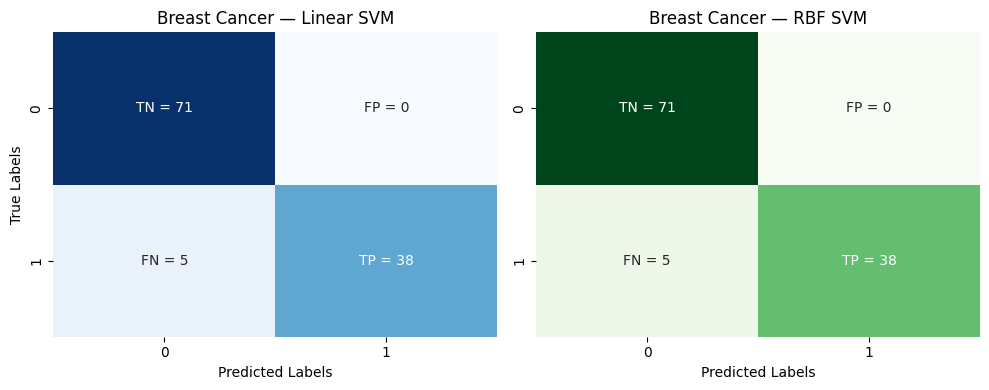

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1) Compute confusion matrices
cm_linear_bc = confusion_matrix(y_test, pred_Linear, labels=['B','M'])
cm_rbf_bc    = confusion_matrix(y_test, pred_RBF, labels=['B','M'])

# 2) Helper function to write TN/FP/FN/TP inside the boxes
def add_labels(cm):
    tn, fp, fn, tp = cm.ravel()
    return np.array([
        [f"TN = {tn}", f"FP = {fp}"],
        [f"FN = {fn}", f"TP = {tp}"]
    ])

annot_linear_bc = add_labels(cm_linear_bc)
annot_rbf_bc    = add_labels(cm_rbf_bc)

# 3) Plot heatmaps side by side
plt.figure(figsize=(10,4))

# --- Linear SVM ---
plt.subplot(1,2,1)
sns.heatmap(cm_linear_bc, annot=annot_linear_bc, fmt='', cmap='Blues', cbar=False)
plt.title("Breast Cancer — Linear SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# --- RBF SVM ---
plt.subplot(1,2,2)
sns.heatmap(cm_rbf_bc, annot=annot_rbf_bc, fmt='', cmap='Greens', cbar=False)
plt.title("Breast Cancer — RBF SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("")

plt.tight_layout()
plt.show()


# ROC & AUC

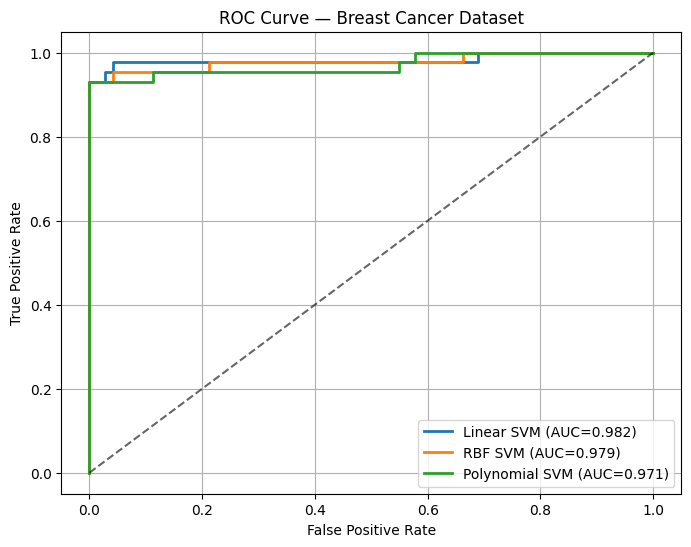

In [7]:
# 1) Convert y_test to binary for ROC
y_test_binary = (y_test == 'M').astype(int)

# 2) Get probability scores from each model
y_scores_linear = svmLinear.decision_function(X_test)
y_scores_rbf    = svmRBF.decision_function(X_test)
y_scores_poly   = svmPoly.decision_function(X_test)

# 3) ROC Curve points (FPR & TPR)
from sklearn.metrics import roc_curve, roc_auc_score

fpr_linear, tpr_linear, _ = roc_curve(y_test_binary, y_scores_linear)
fpr_rbf,    tpr_rbf,    _ = roc_curve(y_test_binary, y_scores_rbf)
fpr_poly,   tpr_poly,   _ = roc_curve(y_test_binary, y_scores_poly)

# 4) AUC
auc_linear = roc_auc_score(y_test_binary, y_scores_linear)
auc_rbf    = roc_auc_score(y_test_binary, y_scores_rbf)
auc_poly   = roc_auc_score(y_test_binary, y_scores_poly)

# 5) Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_linear, tpr_linear, label=f"Linear SVM (AUC={auc_linear:.3f})", linewidth=2)
plt.plot(fpr_rbf,    tpr_rbf,    label=f"RBF SVM (AUC={auc_rbf:.3f})", linewidth=2)
plt.plot(fpr_poly,   tpr_poly,   label=f"Polynomial SVM (AUC={auc_poly:.3f})", linewidth=2)

plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.title("ROC Curve — Breast Cancer Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



# Hyperparameter Tuning

In [8]:
#(Manual tuning) for the Cancer(RBF)
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

best_score = 0
best_params = {}

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"C={C}, gamma={gamma} -> Accuracy: {acc:.4f}")

        if acc > best_score:
            best_score = acc
            best_params = {"C": C, "gamma": gamma}

print("\nBest params (RBF, Breast Cancer):", best_params)
print("Best accuracy:", best_score)

# (Manual tuning) for the Cancer (Linear)
C_values = [0.1, 1, 10]

best_score_linear = 0
best_params_linear = {}

for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"C={C} -> Accuracy: {acc:.4f}")

    if acc > best_score_linear:
        best_score_linear = acc
        best_params_linear = {"C": C}

print("\nBest params (Linear, Breast Cancer):", best_params_linear)
print("Best accuracy:", best_score_linear)

# (Manual tuning) for the Cancer (Polynomial)
C_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

best_score_poly = 0
best_params_poly = {}

for C in C_values:
    for d in degree_values:
        clf = SVC(kernel='poly', C=C, degree=d)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"C={C}, degree={d} -> Accuracy: {acc:.4f}")

        if acc > best_score_poly:
            best_score_poly = acc
            best_params_poly = {"C": C, "degree": d}

print("\nBest params (Polynomial, Breast Cancer):", best_params_poly)
print("Best accuracy:", best_score_poly)

C=0.1, gamma=scale -> Accuracy: 0.9211
C=0.1, gamma=auto -> Accuracy: 0.9211
C=1, gamma=scale -> Accuracy: 0.9561
C=1, gamma=auto -> Accuracy: 0.9561
C=10, gamma=scale -> Accuracy: 0.9737
C=10, gamma=auto -> Accuracy: 0.9737

Best params (RBF, Breast Cancer): {'C': 10, 'gamma': 'scale'}
Best accuracy: 0.9736842105263158
C=0.1 -> Accuracy: 0.9649
C=1 -> Accuracy: 0.9561
C=10 -> Accuracy: 0.9474

Best params (Linear, Breast Cancer): {'C': 0.1}
Best accuracy: 0.9649122807017544
C=0.1, degree=2 -> Accuracy: 0.7368
C=0.1, degree=3 -> Accuracy: 0.8246
C=0.1, degree=4 -> Accuracy: 0.7544
C=1, degree=2 -> Accuracy: 0.7719
C=1, degree=3 -> Accuracy: 0.8860
C=1, degree=4 -> Accuracy: 0.7719
C=10, degree=2 -> Accuracy: 0.8158
C=10, degree=3 -> Accuracy: 0.9298
C=10, degree=4 -> Accuracy: 0.7719

Best params (Polynomial, Breast Cancer): {'C': 10, 'degree': 3}
Best accuracy: 0.9298245614035088


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# K Means for Cancer using scaled data

In [9]:
import numpy as np
from sklearn.cluster import KMeans
#KMeans with K= 2
kmeans_bc = KMeans(n_clusters=2, random_state=42)
kmeans_bc.fit(X_s)

cluster_labels = kmeans_bc.labels_ # clustering

#T labels (M= 1, B= 0)
y_true_binary = (y== 'M').astype(int)

# check both mappings (sometimes KMeans flips 0/1)
acc1 =accuracy_score(y_true_binary, cluster_labels)
acc2= accuracy_score(y_true_binary, 1 - cluster_labels)

best_acc = max(acc1, acc2)

print("K-Means (Breast Cancer, K=2)")
print("Best accuracy:", best_acc)

# confusion matrix
best_labels = cluster_labels if acc1 > acc2 else 1 - cluster_labels
cm = confusion_matrix(y_true_binary, best_labels)
print("\nConfusion matrix:\n", cm)

K-Means (Breast Cancer, K=2)
Best accuracy: 0.9121265377855887

Confusion matrix:
 [[344  13]
 [ 37 175]]


# Hierarchical clustering (single+ complete linkage)

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Hierarchical — Single linkage
link_single = linkage(X_s, method='single')
clusters_single = fcluster(link_single, t=2, criterion='maxclust')

# check both mappings (sometimes labels flip)
acc_single_1 = accuracy_score(y_true_binary, clusters_single - 1)
acc_single_2 = accuracy_score(y_true_binary, 1 - (clusters_single - 1))
best_acc_single = max(acc_single_1, acc_single_2)

print("Hierarchical (Single linkage)")
print("Best accuracy:", best_acc_single)

# Hierarchical — Complete linkage
link_complete = linkage(X_s, method='complete')
clusters_complete = fcluster(link_complete, t=2, criterion='maxclust')

acc_comp_1 = accuracy_score(y_true_binary, clusters_complete - 1)
acc_comp_2 = accuracy_score(y_true_binary, 1 - (clusters_complete - 1))
best_acc_complete = max(acc_comp_1, acc_comp_2)

print("\nHierarchical (Complete linkage)")
print("Best accuracy:", best_acc_complete)

Hierarchical (Single linkage)
Best accuracy: 0.6309314586994728

Hierarchical (Complete linkage)
Best accuracy: 0.6309314586994728


# Dendrogram

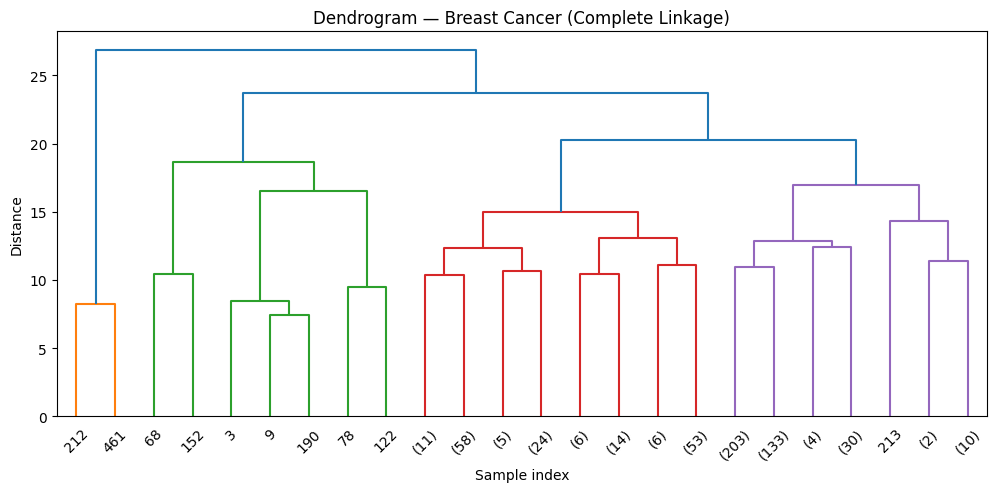

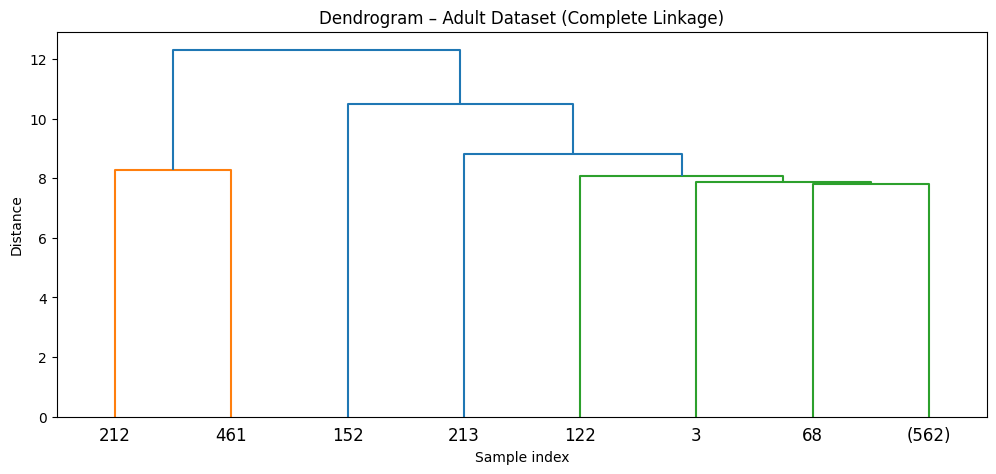

In [11]:
plt.figure(figsize=(12, 5))
dendrogram(link_complete, truncate_mode='level', p=5)
plt.title("Dendrogram — Breast Cancer (Complete Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


plt.figure(figsize=(12, 5))
dendrogram(link_single, truncate_mode='level', p=5)
plt.title("Dendrogram – Adult Dataset (Complete Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
# i used tow clusters .... M or B ... ≤50K or >50K

# PCA

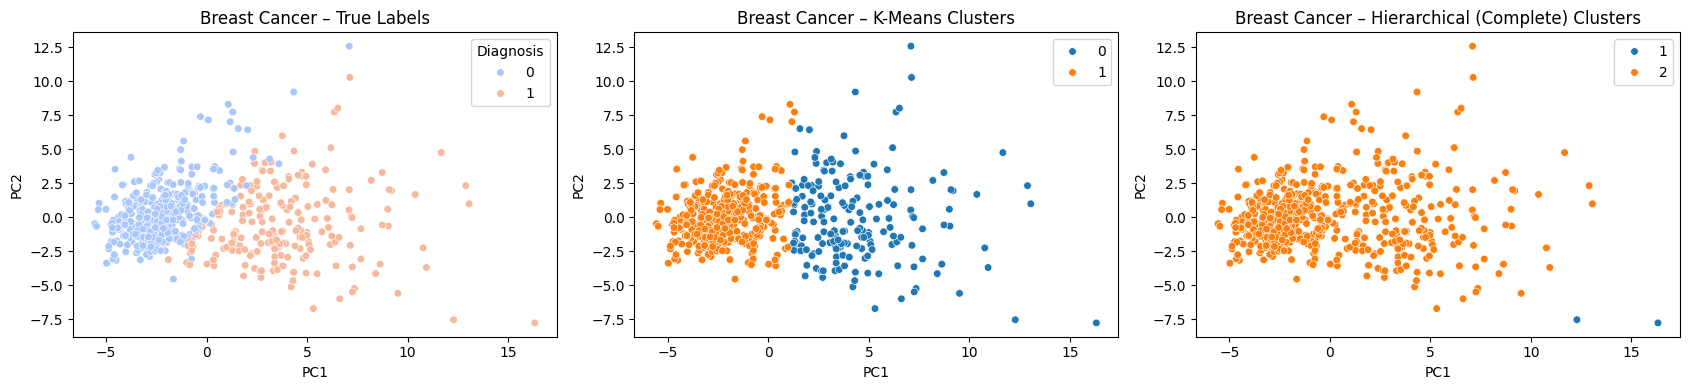


=== Cluster vs True Labels (K-Means) ===
Diagnosis    0    1
row_0              
0           13  175
1          344   37


=== Cluster vs True Labels (Hierarchical - Complete) ===
Diagnosis    0    1
row_0              
1            0    2
2          357  210


In [12]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_s)


y_true_binary = y_true_binary.squeeze()
cluster_labels = cluster_labels.squeeze()
clusters_complete = clusters_complete.squeeze()

plt.figure(figsize=(17, 4))

##T Labels
plt.subplot(1, 3, 1)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_true_binary,
    palette="coolwarm", s=30
)
plt.title("Breast Cancer – True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")

#K Means clusters
plt.subplot(1, 3, 2)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=cluster_labels,
    palette="tab10", s=30
)
plt.title("Breast Cancer – K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

#Hierarchical Complete
plt.subplot(1, 3, 3)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=clusters_complete,
    palette="tab10", s=30
)



plt.title("Breast Cancer – Hierarchical (Complete) Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

#plot
print("\n=== Cluster vs True Labels (K-Means) ===")
print(pd.crosstab(cluster_labels, y_true_binary))
print("\n")

print("=== Cluster vs True Labels (Hierarchical - Complete) ===")
print(pd.crosstab(clusters_complete, y_true_binary))

# Adult DataSet--------------------------------

In [13]:
from google.colab import drive
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X_Adult = adult.data.features
y_Adult = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# Preprocessing for Adult Dataset

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#دمجت الداتا
adult_df = pd.concat([X_Adult, y_Adult], axis=1)

#replacing ?
adult_df = adult_df.replace('?', np.nan)

#missing
adult_df = adult_df.dropna()

#splitting
X_adult = adult_df.drop('income', axis=1)
y_adult = adult_df['income']

#drop spaces and .
y_adult = y_adult.str.strip().str.replace(".", "", regex=False)

#encoding
y_adult = y_adult.map({'<=50K': 0, '>50K': 1})

#droping any NaN
valid_idx = y_adult.dropna().index
y_adult = y_adult.loc[valid_idx]
X_adult = X_adult.loc[valid_idx]

#1 hot encoding
X_adult = pd.get_dummies(X_adult)

#scaling
scaler = StandardScaler()
X_adult_scaled = scaler.fit_transform(X_adult)

# spliting
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_scaled, y_adult, test_size=0.2, random_state=42)


# Training SVM models

In [15]:
from sklearn.svm import SVC

# Linear SVM
svmLinear_adult = SVC(kernel='linear')
svmLinear_adult.fit(X_train_adult, y_train_adult)
y_pred_linear_adult = svmLinear_adult.predict(X_test_adult)

# RBF SVM
svm_rbf_adult = SVC(kernel='rbf')
svm_rbf_adult.fit(X_train_adult, y_train_adult)
y_pred_rbf_adult = svm_rbf_adult.predict(X_test_adult)

# Polynomial SVM
svm_poly_adult = SVC(kernel='poly', degree=3)
svm_poly_adult.fit(X_train_adult, y_train_adult)
y_pred_poly_adult = svm_poly_adult.predict(X_test_adult)


In [16]:
pred_Linear_adult = svmLinear_adult.predict(X_test_adult)
pred_RBF_adult = svm_rbf_adult.predict(X_test_adult)
pred_Poly_adult = svm_poly_adult.predict(X_test_adult)


# Evaluating:

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score ,roc_curve, f1_score, recall_score, precision_score, classification_report

print("Linear SVM (Adult Income):")
print("Accuracy:", accuracy_score(y_test_adult, pred_Linear_adult))
print("Recall:", recall_score(y_test_adult, pred_Linear_adult))
print("Precision:", precision_score(y_test_adult, pred_Linear_adult))
print("f1:", f1_score(y_test_adult, pred_Linear_adult))

print("-----------------------")

print("RBF SVM (Adult Income):")
print("Accuracy:", accuracy_score(y_test_adult, pred_RBF_adult))
print("Recall:", recall_score(y_test_adult, pred_RBF_adult))
print("Precision:", precision_score(y_test_adult, pred_RBF_adult))
print("f1:", f1_score(y_test_adult, pred_RBF_adult))

print("-----------------------")

print("Polynomial SVM (Adult Income):")
print("Accuracy:", accuracy_score(y_test_adult, pred_Poly_adult))
print("Recall:", recall_score(y_test_adult, pred_Poly_adult))
print("Precision:", precision_score(y_test_adult, pred_Poly_adult))
print("f1:", f1_score(y_test_adult, pred_Poly_adult))
print("-----------------------")

Linear SVM (Adult Income):
Accuracy: 0.8473189607517966
Recall: 0.5808695652173913
Precision: 0.7621220764403879
f1: 0.6592647421662966
-----------------------
RBF SVM (Adult Income):
Accuracy: 0.8480928689883914
Recall: 0.5708695652173913
Precision: 0.7723529411764706
f1: 0.6565
-----------------------
Polynomial SVM (Adult Income):
Accuracy: 0.8278606965174129
Recall: 0.49043478260869566
Precision: 0.7455386649041639
f1: 0.5916601101494886
-----------------------


# Confusion Matrix: for SVM models (Adult)

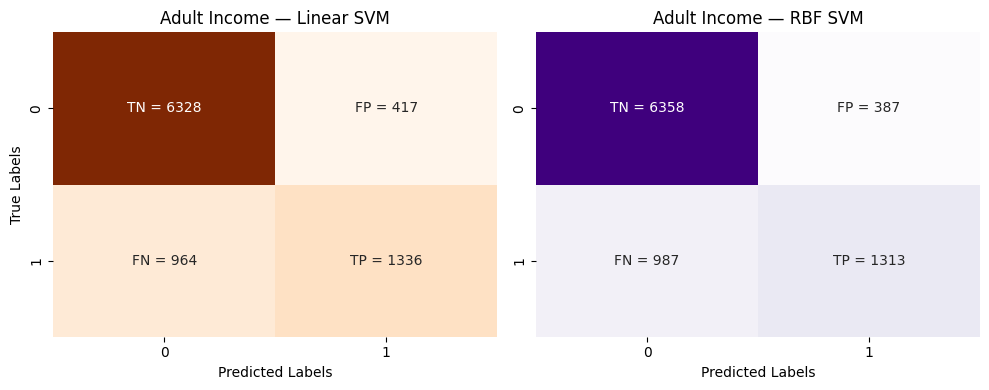

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#Compute confusion matrices
cm_linear_adult= confusion_matrix(y_test_adult, y_pred_linear_adult, labels=[0,1])
cm_rbf_adult= confusion_matrix(y_test_adult, y_pred_rbf_adult, labels=[0,1])

# helper function
def add_labels(cm):
    tn, fp, fn, tp =cm.ravel()
    return np.array([
        [f"TN = {tn}", f"FP = {fp}"],
        [f"FN = {fn}", f"TP = {tp}"]
    ])

annot_linear_adult = add_labels(cm_linear_adult)
annot_rbf_adult    = add_labels(cm_rbf_adult)

#Plot heatmaps
plt.figure(figsize=(10,4))

#Linear SVM ---
plt.subplot(1,2,1)
sns.heatmap(cm_linear_adult, annot=annot_linear_adult, fmt='', cmap='Oranges', cbar=False)
plt.title("Adult Income — Linear SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

#RBF SVM
plt.subplot(1,2,2)
sns.heatmap(cm_rbf_adult, annot=annot_rbf_adult, fmt='', cmap='Purples', cbar=False)
plt.title("Adult Income — RBF SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("")

plt.tight_layout()
plt.show()


# ROC & AUC

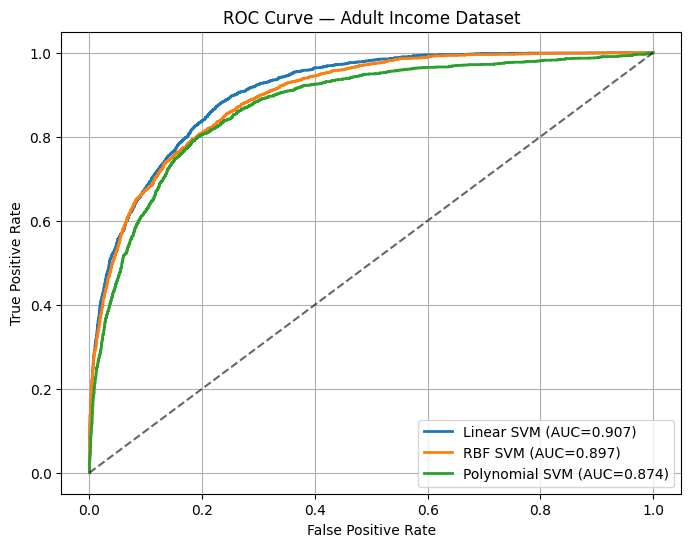

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

#y_test_adult is already numeric (0/1), so no conversion needed:
y_test_adult_binary = y_test_adult   # safe

#decision scores for each models
y_scores_linear_adult = svmLinear_adult.decision_function(X_test_adult)
y_scores_rbf_adult    = svm_rbf_adult.decision_function(X_test_adult)
y_scores_poly_adult   = svm_poly_adult.decision_function(X_test_adult)

#Computing FPR/TPR
fpr_linear_adult, tpr_linear_adult, _ = roc_curve(y_test_adult_binary, y_scores_linear_adult)
fpr_rbf_adult,    tpr_rbf_adult,    _ = roc_curve(y_test_adult_binary, y_scores_rbf_adult)
fpr_poly_adult,   tpr_poly_adult,   _ = roc_curve(y_test_adult_binary, y_scores_poly_adult)

#AUC
auc_linear_adult = roc_auc_score(y_test_adult_binary, y_scores_linear_adult)
auc_rbf_adult    = roc_auc_score(y_test_adult_binary, y_scores_rbf_adult)
auc_poly_adult   = roc_auc_score(y_test_adult_binary, y_scores_poly_adult)

#Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_linear_adult, tpr_linear_adult, label=f"Linear SVM (AUC={auc_linear_adult:.3f})", linewidth=2)
plt.plot(fpr_rbf_adult,    tpr_rbf_adult,    label=f"RBF SVM (AUC={auc_rbf_adult:.3f})", linewidth=2)
plt.plot(fpr_poly_adult,   tpr_poly_adult,   label=f"Polynomial SVM (AUC={auc_poly_adult:.3f})", linewidth=2)

plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.title("ROC Curve — Adult Income Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Hyperparameatr Tuning

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#(Manual tuning)) for the Adut(RBF)
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

best_score_adult = 0
best_params_adult = {}

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train_adult, y_train_adult)
        y_pred = clf.predict(X_test_adult)
        acc = accuracy_score(y_test_adult, y_pred)

        print(f"C={C}, gamma={gamma} -> Accuracy: {acc:.4f}")

        if acc > best_score_adult:
            best_score_adult = acc
            best_params_adult = {"C": C, "gamma": gamma}

print("\nBest params (RBF, Adult):", best_params_adult)
print("Best accuracy:", best_score_adult)

# (Manual tuning) for the Adult (Linear)
C_values = [0.1, 1, 10]

best_score_linear_adult = 0
best_params_linear_adult = {}

for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train_adult, y_train_adult)
    y_pred = clf.predict(X_test_adult)
    acc = accuracy_score(y_test_adult, y_pred)

    print(f"C={C} -> Accuracy: {acc:.4f}")

    if acc > best_score_linear_adult:
        best_score_linear_adult = acc
        best_params_linear_adult = {"C": C}

print("\nBest params (Linear, Adult):", best_params_linear_adult)
print("Best accuracy:", best_score_linear_adult)

# (Manual tuning) for the Adult (Polynomial)
C_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

best_score_poly_adult = 0
best_params_poly_adult = {}

for C in C_values:
    for d in degree_values:
        clf = SVC(kernel='poly', C=C, degree=d)
        clf.fit(X_train_adult, y_train_adult)
        y_pred = clf.predict(X_test_adult)
        acc = accuracy_score(y_test_adult, y_pred)

        print(f"C={C}, degree={d} -> Accuracy: {acc:.4f}")

        if acc > best_score_poly_adult:
            best_score_poly_adult = acc
            best_params_poly_adult = {"C": C, "degree": d}

print("\nBest params (Polynomial, Adult):", best_params_poly_adult)
print("Best accuracy:", best_score_poly_adult)

C=0.1, gamma=scale -> Accuracy: 0.8328
C=0.1, gamma=auto -> Accuracy: 0.8327
C=1, gamma=scale -> Accuracy: 0.8481
C=1, gamma=auto -> Accuracy: 0.8481
C=10, gamma=scale -> Accuracy: 0.8478
C=10, gamma=auto -> Accuracy: 0.8478

Best params (RBF, Adult): {'C': 1, 'gamma': 'scale'}
Best accuracy: 0.8480928689883914
C=0.1 -> Accuracy: 0.8483
C=1 -> Accuracy: 0.8473
C=10 -> Accuracy: 0.8475

Best params (Linear, Adult): {'C': 0.1}
Best accuracy: 0.8483139856274184
C=0.1, degree=2 -> Accuracy: 0.8218
C=0.1, degree=3 -> Accuracy: 0.7930
C=0.1, degree=4 -> Accuracy: 0.7694
C=1, degree=2 -> Accuracy: 0.8282
C=1, degree=3 -> Accuracy: 0.8279
C=1, degree=4 -> Accuracy: 0.8055
C=10, degree=2 -> Accuracy: 0.8367
C=10, degree=3 -> Accuracy: 0.8352
C=10, degree=4 -> Accuracy: 0.8296

Best params (Polynomial, Adult): {'C': 10, 'degree': 2}
Best accuracy: 0.8367053620784964


# K means foe adult

In [22]:
import numpy as np
from sklearn.cluster import KMeans
#the T labels already mapped-> (<=50K=0, >50K=1)
y_true_adult = y_adult.values

kmeans_adult = KMeans(n_clusters=2, random_state=42) #k=2
kmeans_adult.fit(X_adult_scaled)

cluster_labels_adult = kmeans_adult.labels_

# check both mappings (KMeans may flip 0/1)
acc1 = accuracy_score(y_true_adult, cluster_labels_adult)
acc2 = accuracy_score(y_true_adult, 1 - cluster_labels_adult)
best_acc = max(acc1, acc2)

print("K-Means (Adult, K=2)")
print("Best accuracy:", best_acc)

# confusion matrix
best_labels_adult = cluster_labels_adult if acc1 > acc2 else 1 - cluster_labels_adult
cm_adult = confusion_matrix(y_true_adult, best_labels_adult)
print("\nConfusion matrix:\n", cm_adult)

K-Means (Adult, K=2)
Best accuracy: 0.757772765468135

Confusion matrix:
 [[33869   145]
 [10809   399]]


# Hierarchical clustering (single+ complete linkage)

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score ,roc_curve, f1_score, recall_score, precision_score, classification_report
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Hierarchical — Single linkage
link_single_adult = linkage(X_adult_scaled, method='single')
clusters_single_adult = fcluster(link_single_adult, t=2, criterion='maxclust')

labels_single = clusters_single_adult - 1
acc_single_1 = accuracy_score(y_true_adult, labels_single)
acc_single_2 = accuracy_score(y_true_adult, 1 - labels_single)
best_acc_single = max(acc_single_1, acc_single_2)

print("Hierarchical (Adult, Single linkage)")
print("Best accuracy:", best_acc_single)

# Hierarchical — Complete linkage
link_complete_adult = linkage(X_adult_scaled, method='complete')
clusters_complete_adult = fcluster(link_complete_adult, t=2, criterion='maxclust')

labels_complete = clusters_complete_adult - 1
acc_comp_1 = accuracy_score(y_true_adult, labels_complete)
acc_comp_2 = accuracy_score(y_true_adult, 1 - labels_complete)
best_acc_complete = max(acc_comp_1, acc_comp_2)

print("\nHierarchical (Adult, Complete linkage)")
print("Best accuracy:", best_acc_complete)

NameError: name 'X_adult_scaled' is not defined

# PCA

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#PCA
pca_adult = PCA(n_components=2)
X_pca_adult = pca_adult.fit_transform(X_adult_scaled)

#make sure its 1D
y_true_adult = y_adult.squeeze()
cluster_labels_adult = cluster_labels_adult.squeeze()
clusters_complete_adult = clusters_complete_adult.squeeze()

#the plot
plt.figure(figsize=(17, 4))

#T Labels
plt.subplot(1, 3, 1)
sns.scatterplot(
    x=X_pca_adult[:, 0], y=X_pca_adult[:, 1],
    hue=y_true_adult,
    palette="coolwarm", s=30
)
plt.title("Adult Dataset – True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")

#K Means clusters
plt.subplot(1, 3, 2)
sns.scatterplot(
    x=X_pca_adult[:, 0], y=X_pca_adult[:, 1],
    hue=cluster_labels_adult,
    palette="tab10", s=30
)
plt.title("Adult Dataset – K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

#Hierarchical   (Complete)
plt.subplot(1, 3, 3)
sns.scatterplot(
    x=X_pca_adult[:, 0], y=X_pca_adult[:, 1],
    hue=clusters_complete_adult,
    palette="tab10", s=30
)
plt.title("Adult Dataset – Hierarchical (Complete) Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

#tables
print("\n=== Cluster vs True Labels (K-Means – Adult) ===")
print(pd.crosstab(cluster_labels_adult, y_true_adult))
print("\n")

print("=== Cluster vs True Labels (Hierarchical - Complete – Adult) ===")
print(pd.crosstab(clusters_complete_adult, y_true_adult))